In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import data

In [2]:
df = pd.read_csv('zipnames.csv')
df = pd.DataFrame(df)

In [3]:
df.drop('Unnamed: 0', axis = 1,  inplace = True)
df = df[['Date', 'average_listing_price', 'zip_name']]
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [4]:
percent1 = []
for i in df.zip_name.unique():
    temp1 = df[df.zip_name == i]
    temp1.groupby(['Date'])['average_listing_price'].mean()
    pricechange1 = (temp1['average_listing_price'].iloc[-1]) - (temp1['average_listing_price'].iloc[0])
    percentchangezip = ((pricechange1)) / (temp1['average_listing_price'].iloc[0]) * 100
    percent1.append([i,percentchangezip])

In [5]:
col = ['State', 'percentincrease']
top_5 = pd.DataFrame(percent1, columns = col)

In [6]:
top_5 = top_5.sort_values(by = 'percentincrease', ascending = 0).head(5)

In [7]:
location = list(top_5.State)

In [8]:
def auto_corr(df):
    for i in location:
        temp = df[df.zip_name == i]
        temp.groupby(['Date'])['average_listing_price'].mean()
        temp = temp.sort_values(by = 'Date')
        temp = temp.drop('zip_name', axis = 1)
        temp = temp.drop('Date', axis = 1)
        curent_city = i
        autocorrelation_plot(temp)
        plt.title('autocorrelation for ' + str(i))
        plt.show()

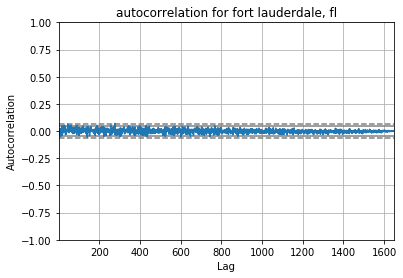

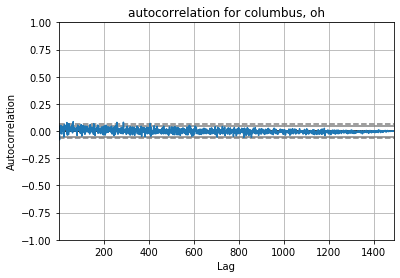

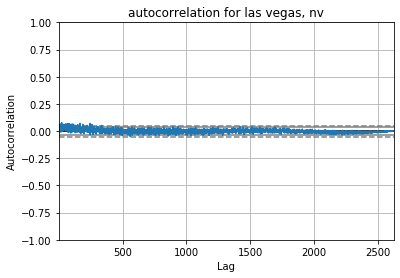

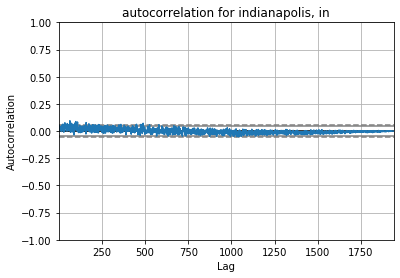

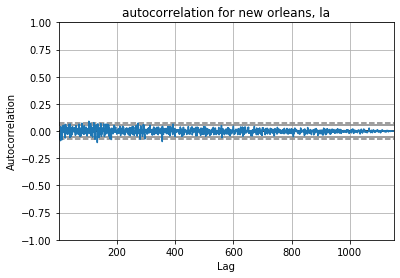

In [9]:
auto_corr(df)

Auto-Arima, choses the best peramiters for an ARIMA model given your data

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

def auto_ARIMA(df_1):# Seasonal - fit stepwise auto-ARIMA
    smodel = pm.auto_arima(df_1, start_p=1, start_q=1,
                             test='adf',
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=None, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)

    smodel.summary()
    

In [11]:
for i in location:
    i_df = df[df['zip_name'] == i]
    i_df.drop('zip_name', axis = 1)
    i_df.sort_values(by = 'Date', inplace = True)
    i_df = i_df.groupby(['Date'])['average_listing_price'].mean()
    i_df.reindex(['average_listing_price'], axis = 0)
    
    print('-----------------------')
    print(i)
    print('-----------------------')
    auto_ARIMA(i_df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


-----------------------
fort lauderdale, fl
-----------------------
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1064.840, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1065.314, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=1059.766, Time=0.08 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=1061.541, Time=0.18 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=1061.410, Time=0.23 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=1059.811, Time=0.08 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=1063.372, Time=0.56 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=1082.511, Time=0.05 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=1057.846, Time=0.14 sec
 ARIMA(0,2,2)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,2)(1,1,1)[12]             : AIC=1059.664, Time=0.30 sec
 ARIMA(0,2,2)(0,1,2)[12]         

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1081.026, Time=0.12 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=1060.210, Time=0.09 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=1061.775, Time=0.14 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=1062.133, Time=0.21 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=1060.243, Time=0.11 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=1063.732, Time=0.60 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=1103.101, Time=0.04 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=1060.012, Time=0.15 sec
 ARIMA(0,2,2)(0,1,0)[12]             : AIC=1058.838, Time=0.06 sec
 ARIMA(0,2,2)(1,1,0)[12]             : AIC=1060.049, Time=0.20 sec
 ARIMA(0,2,2)(1,1,1)[12]             : AIC=1061.447, Time=0.20 sec
 ARIMA(1,2,2)(0,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,3)(0,1,0)[12]             : AIC=1064.425, Time=0.06 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(1,2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


 ARIMA(1,2,1)(0,1,1)[12]             : AIC=1041.812, Time=0.24 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1050.520, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1055.484, Time=0.07 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=1054.601, Time=0.09 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=1053.229, Time=0.06 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=1042.450, Time=0.27 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=1039.541, Time=0.62 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=1041.541, Time=0.84 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=1050.733, Time=0.27 sec
 ARIMA(1,2,0)(0,1,2)[12]             : AIC=1051.017, Time=0.19 sec
 ARIMA(2,2,1)(0,1,2)[12]             : AIC=1041.391, Time=0.64 sec
 ARIMA(1,2,2)(0,1,2)[12]             : AIC=1040.291, Time=1.02 sec
 ARIMA(0,2,0)(0,1,2)[12]             : AIC=1048.978, Time=0.11 sec
 ARIMA(0,2,2)(0,1,2)[12]             : AIC=1052.449, Time=0.24 sec
 ARIMA(2,2,0)(0,1,2)[12]             : AIC=1051.974, Time=0.19

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1138.127, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1146.843, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1136.076, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1135.303, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1163.470, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1137.184, Time=0.02 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1137.174, Time=0.12 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1137.303, Time=0.22 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1135.642, Time=0.05 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1139.017, Time=0.39 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=1136.768, Time=0.11 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1136.827, Time=0.16 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1138.849, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12]             : AIC=inf, Time=0.17 sec

Best

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1032.831, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1030.549, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1030.788, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1030.850, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1028.954, Time=0.07 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1031.116, Time=0.11 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1037.678, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1030.757, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1032.737, Time=0.16 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=1030.928, Time=0.08 sec

Best model:  ARIMA(0,1,0)(1,1,0)[12]          
Total fit time: 1.418 seconds


best Arima models is as follows

fort lauderdale, fl Best model:  ARIMA(0,2,3)(0,1,1) <br>
columbus, oh, Best model: ARIMA(0,2,2)(0,1,0) <br>
las vegas, nv Best model:   ARIMA(1,2,1)(0,1,2) <br>
indianapolis, in Best model:  ARIMA(0,0,1)(0,1,1) <br>
new orleans, la Best model:  ARIMA(0,1,0)(1,1,0) <br>

# fort lauderdale, fl

In [12]:
from statsmodels.tsa.stattools import acf
testdf = df[df['zip_name'] == location[0]]
testdf.drop('zip_name', axis = 1, inplace = True)
testdf.sort_values(by = 'Date', inplace = True)
testdf = testdf.groupby(['Date'])['average_listing_price'].mean()
testdf.reindex(['average_listing_price'], axis = 0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


"\n# Create Training and Test\ntrain = testdf.values[:50]\ntest = testdf.values[50:]\n\n# Build Model\nmodel = ARIMA(train, order=(0,2,3))  \n#model = ARIMA(train, order=(1, 1, 1))  \nfitted = model.fit(disp=-1)  \n\n# Forecast\nfc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% confidence interval\n\n# Make as pandas series\nfc_series = pd.Series(fc)#, index=index)\nlower_series = pd.Series(conf[:, 0])#, index=index)\nupper_series = pd.Series(conf[:, 1])#, index=index)\n\n# Plot\nplt.figure(figsize=(12,5), dpi=100)\nplt.plot(train, label='training')\nplt.plot(range(50,61),test, label='actual')\nplt.plot(range(50,65), fc_series, label='forecast')\nplt.fill_between(range(50,65), lower_series, upper_series, \n                 color='k', alpha=.15)\nplt.title('Forecast vs Actuals')\nplt.legend(loc='upper left', fontsize=8)\nplt.show()\n"

In [18]:
testdf = pd.DataFrame(testdf)
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(testdf.values, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

fort lauderdale, fl
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   60
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -646.746
Method:                       css-mle   S.D. of innovations          11612.991
Date:                Sun, 24 Apr 2022   AIC                           1299.491
Time:                        08:45:35   BIC                           1305.774
Sample:                             1   HQIC                          1301.949
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5099.5362   1765.941      2.888      0.004    1638.355    8560.717
ma.L1.D.y      0.1802      0.112      1.613      0.107      -0.039       0.399
                                

fort lauderdale, fl


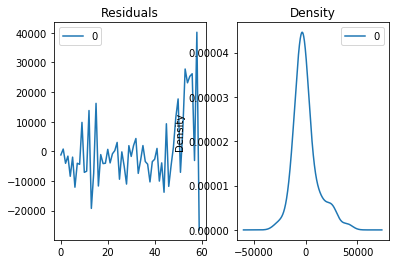

In [19]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

fort lauderdale, fl


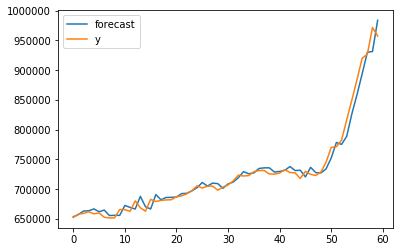

In [20]:
# Actual vs Fitted

model_fit.plot_predict(dynamic=False)
plt.show()

In [16]:
(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   60
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -646.746
Method:                       css-mle   S.D. of innovations          11612.991
Date:                Sun, 24 Apr 2022   AIC                           1299.491
Time:                        08:44:54   BIC                           1305.774
Sample:                             1   HQIC                          1301.949
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5099.5362   1765.941      2.888      0.004    1638.355    8560.717
ma.L1.D.y      0.1802      0.112      1.613      0.107      -0.039       0.399
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -5.5496           +0.0000j            5.5496            0.5000
-----------------------------------------------------------------------------
"""

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


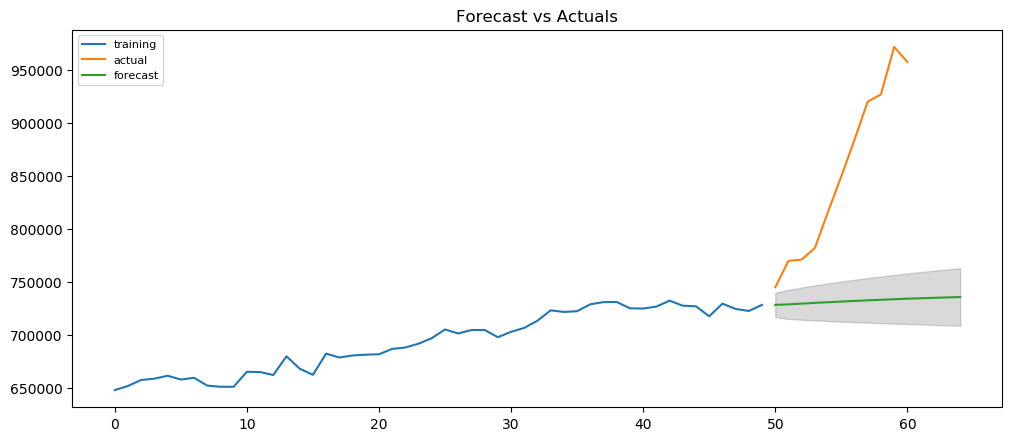

In [17]:
# Create Training and Test
train = testdf.values[:50]
test = testdf.values[50:]

# Build Model
model = ARIMA(train, order=(0,2,3))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% confidence interval

# Make as pandas series
fc_series = pd.Series(fc)#, index=index)
lower_series = pd.Series(conf[:, 0])#, index=index)
upper_series = pd.Series(conf[:, 1])#, index=index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(range(50,61),test, label='actual')
plt.plot(range(50,65), fc_series, label='forecast')
plt.fill_between(range(50,65), lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


# columbus, oh

In [21]:
from statsmodels.tsa.stattools import acf
testdf = df[df['zip_name'] == location[1]]
testdf.drop('zip_name', axis = 1, inplace = True)
testdf.sort_values(by = 'Date', inplace = True)
testdf = testdf.groupby(['Date'])['average_listing_price'].mean()
testdf.reindex(['average_listing_price'], axis = 0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Date
average_listing_price   NaN
Name: average_listing_price, dtype: float64

In [29]:
testdf = pd.DataFrame(testdf)
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(testdf.values, order=(0,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   59
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -643.519
Method:                       css-mle   S.D. of innovations          12774.054
Date:                Sun, 24 Apr 2022   AIC                           1295.037
Time:                        08:48:54   BIC                           1303.347
Sample:                             2   HQIC                          1298.281
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.6170    105.720     -0.242      0.809    -232.825     181.591
ma.L1.D2.y    -0.8842      0.144     -6.144      0.000      -1.166      -0.602
ma.L2.D2.y    -0.1158      0.137     -0.847      0.3

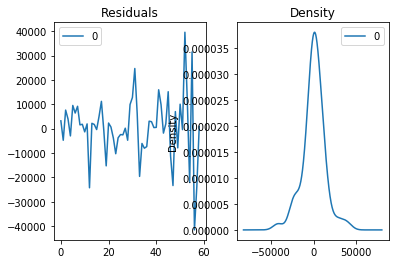

In [30]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

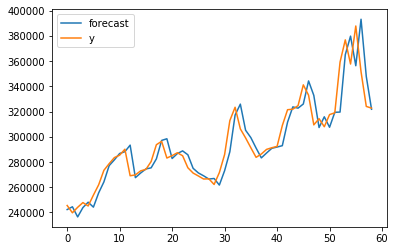

In [31]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [32]:
(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   59
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -643.519
Method:                       css-mle   S.D. of innovations          12774.054
Date:                Sun, 24 Apr 2022   AIC                           1295.037
Time:                        08:48:57   BIC                           1303.347
Sample:                             2   HQIC                          1298.281
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.6170    105.720     -0.242      0.809    -232.825     181.591
ma.L1.D2.y    -0.8842      0.144     -6.144      0.000      -1.166      -0.602
ma.L2.D2.y    -0.1158      0.137     -0.847      0.397      -0.384       0.152
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -8.6340           +0.0000j            8.6340            0.5000
-----------------------------------------------------------------------------
"""

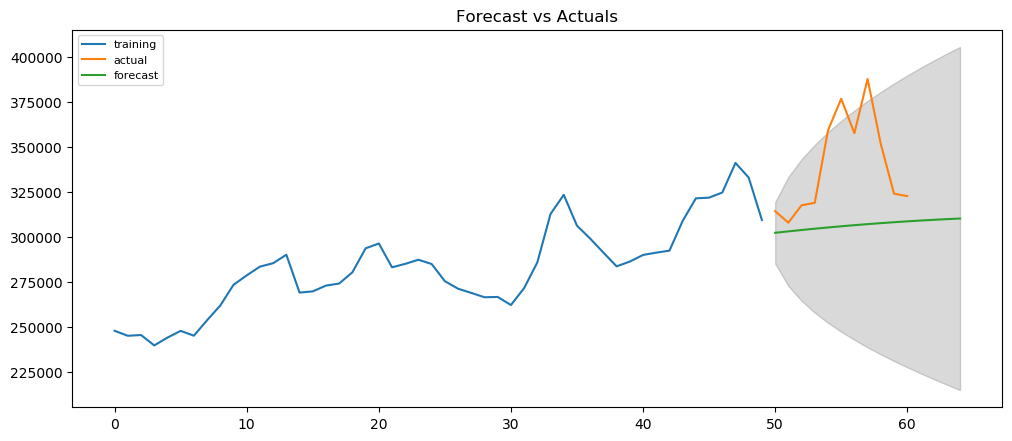

In [33]:
# Create Training and Test
train = testdf.values[:50]
test = testdf.values[50:]

# Build Model
model = ARIMA(train, order=(0,2,2))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% confidence interval

# Make as pandas series
fc_series = pd.Series(fc)#, index=index)
lower_series = pd.Series(conf[:, 0])#, index=index)
upper_series = pd.Series(conf[:, 1])#, index=index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(range(50,61),test, label='actual')
plt.plot(range(50,65), fc_series, label='forecast')
plt.fill_between(range(50,65), lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# las vegas, nv

In [35]:
from statsmodels.tsa.stattools import acf
testdf = df[df['zip_name'] == location[2]]
testdf.drop('zip_name', axis = 1, inplace = True)
testdf.sort_values(by = 'Date', inplace = True)
testdf = testdf.groupby(['Date'])['average_listing_price'].mean()
testdf.reindex(['average_listing_price'], axis = 0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Date
average_listing_price   NaN
Name: average_listing_price, dtype: float64

In [43]:
testdf = pd.DataFrame(testdf)
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(testdf.values, order=(0,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   59
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -632.871
Method:                       css-mle   S.D. of innovations          10962.933
Date:                Sun, 24 Apr 2022   AIC                           1271.743
Time:                        08:51:24   BIC                           1277.976
Sample:                             2   HQIC                          1274.176
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3402    475.195     -0.007      0.994    -934.706     928.025
ma.L1.D2.y    -0.6874      0.165     -4.160      0.000      -1.011      -0.364
                                    Roots           

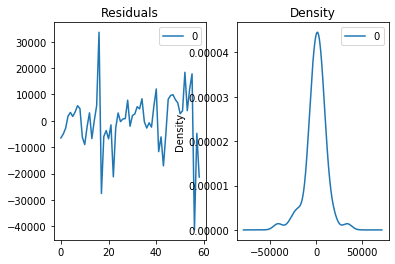

In [44]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

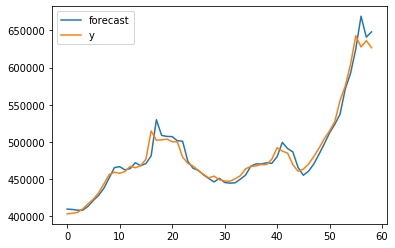

In [45]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [46]:
(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   59
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -632.871
Method:                       css-mle   S.D. of innovations          10962.933
Date:                Sun, 24 Apr 2022   AIC                           1271.743
Time:                        08:51:27   BIC                           1277.976
Sample:                             2   HQIC                          1274.176
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3402    475.195     -0.007      0.994    -934.706     928.025
ma.L1.D2.y    -0.6874      0.165     -4.160      0.000      -1.011      -0.364
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4547           +0.0000j            1.4547            0.0000
-----------------------------------------------------------------------------
"""

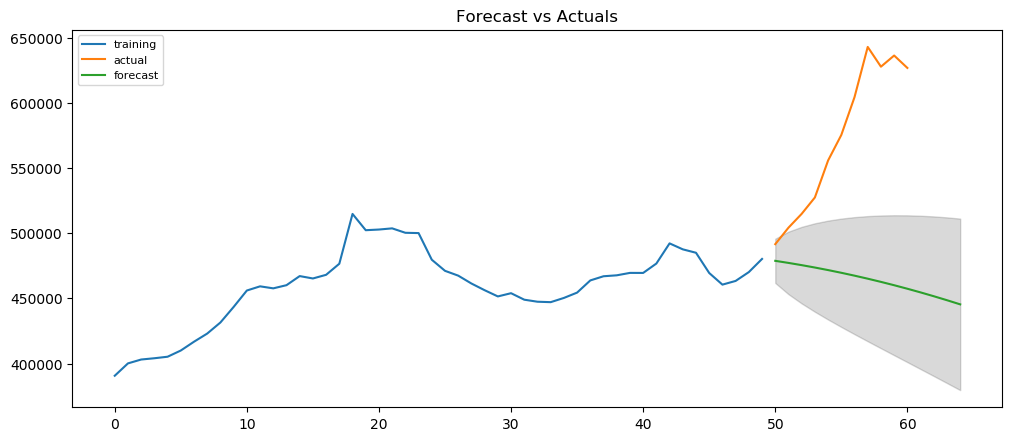

In [47]:
# Create Training and Test
train = testdf.values[:50]
test = testdf.values[50:]

# Build Model
model = ARIMA(train, order=(0,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% confidence interval

# Make as pandas series
fc_series = pd.Series(fc)#, index=index)
lower_series = pd.Series(conf[:, 0])#, index=index)
upper_series = pd.Series(conf[:, 1])#, index=index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(range(50,61),test, label='actual')
plt.plot(range(50,65), fc_series, label='forecast')
plt.fill_between(range(50,65), lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# indianapolis, in


In [48]:
testdf = df[df['zip_name'] == location[3]]
testdf.drop('zip_name', axis = 1, inplace = True)
testdf.sort_values(by = 'Date', inplace = True)
testdf = testdf.groupby(['Date'])['average_listing_price'].mean()
testdf.reindex(['average_listing_price'], axis = 0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date
average_listing_price   NaN
Name: average_listing_price, dtype: float64

In [50]:
testdf = pd.DataFrame(testdf)

# 1,1,2 ARIMA Model
model = ARIMA(testdf.values, order=(0,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   61
Model:                     ARMA(0, 1)   Log Likelihood                -702.474
Method:                       css-mle   S.D. of innovations          24136.740
Date:                Sun, 24 Apr 2022   AIC                           1410.948
Time:                        08:52:45   BIC                           1417.281
Sample:                             0   HQIC                          1413.430
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.814e+05   5221.358     53.903      0.000    2.71e+05    2.92e+05
ma.L1.y        0.7008      0.063     11.163      0.000       0.578       0.824
                                    Roots           

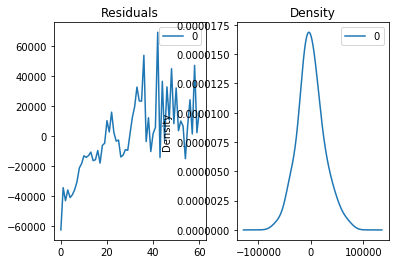

In [51]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [52]:
(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:                     ARMA(0, 1)   Log Likelihood                -702.474
Method:                       css-mle   S.D. of innovations          24136.740
Date:                Sun, 24 Apr 2022   AIC                           1410.948
Time:                        08:53:05   BIC                           1417.281
Sample:                             0   HQIC                          1413.430
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.814e+05   5221.358     53.903      0.000    2.71e+05    2.92e+05
ma.L1.y        0.7008      0.063     11.163      0.000       0.578       0.824
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4269           +0.0000j            1.4269            0.5000
-----------------------------------------------------------------------------
"""

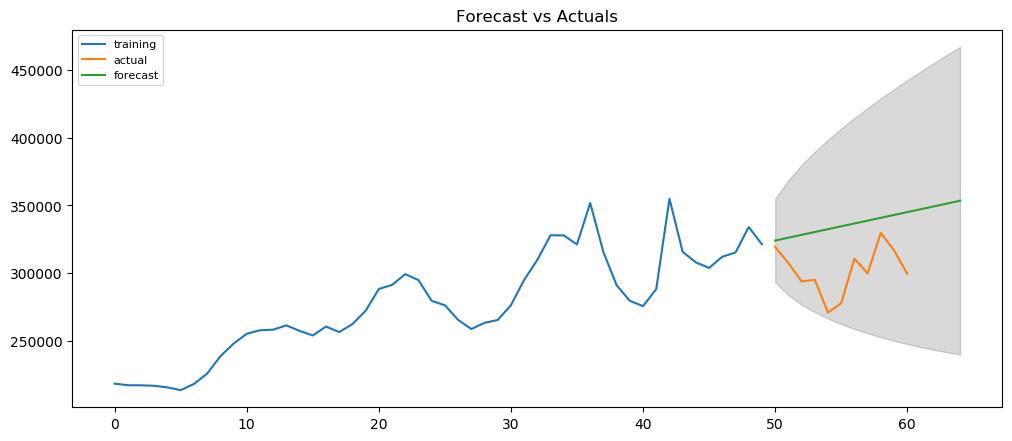

In [57]:
# Create Training and Test
train = testdf.values[:50]
test = testdf.values[50:]

# Build Model
model = ARIMA(train, order=(0,1,1))   
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% confidence interval

# Make as pandas series
fc_series = pd.Series(fc)#, index=index)
lower_series = pd.Series(conf[:, 0])#, index=index)
upper_series = pd.Series(conf[:, 1])#, index=index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(range(50,61),test, label='actual')
plt.plot(range(50,65), fc_series, label='forecast')
plt.fill_between(range(50,65), lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# new orleans, la 

In [60]:
testdf = df[df['zip_name'] == location[4]]
testdf.drop('zip_name', axis = 1, inplace = True)
testdf.sort_values(by = 'Date', inplace = True)
testdf = testdf.groupby(['Date'])['average_listing_price'].mean()
testdf.reindex(['average_listing_price'], axis = 0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date
average_listing_price   NaN
Name: average_listing_price, dtype: float64

In [62]:
testdf = pd.DataFrame(testdf)

# 1,1,2 ARIMA Model
model = ARIMA(testdf.values, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   60
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -624.555
Method:                           css   S.D. of innovations           8024.984
Date:                Sun, 24 Apr 2022   AIC                           1253.110
Time:                        08:55:12   BIC                           1257.299
Sample:                             1   HQIC                          1254.749
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        663.2775   1036.021      0.640      0.522   -1367.286    2693.841


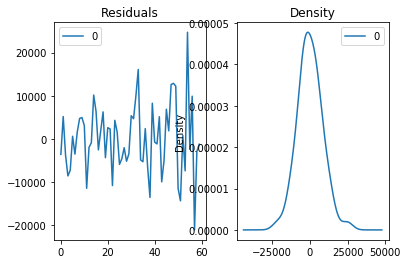

In [63]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [64]:
(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   60
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -624.555
Method:                           css   S.D. of innovations           8024.984
Date:                Sun, 24 Apr 2022   AIC                           1253.110
Time:                        08:55:29   BIC                           1257.299
Sample:                             1   HQIC                          1254.749
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        663.2775   1036.021      0.640      0.522   -1367.286    2693.841
==============================================================================
"""

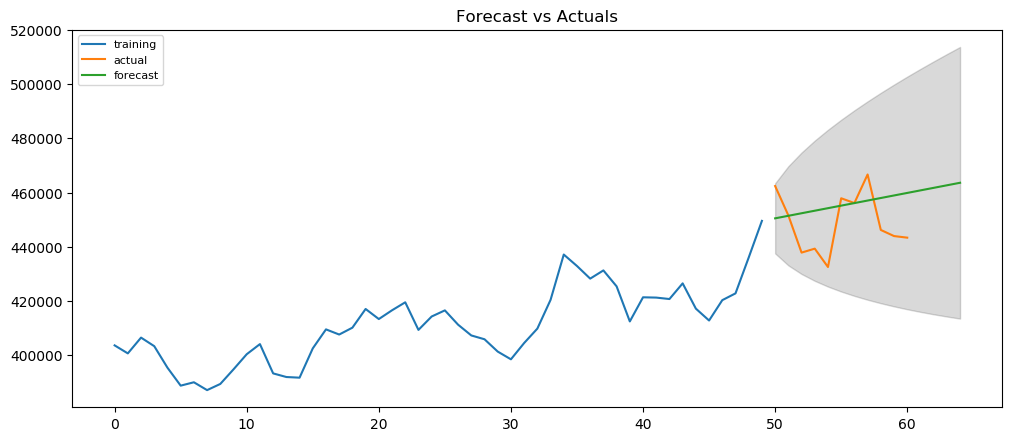

In [65]:
# Create Training and Test
train = testdf.values[:50]
test = testdf.values[50:]

# Build Model
model = ARIMA(train, order=(0,1,0))   
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% confidence interval

# Make as pandas series
fc_series = pd.Series(fc)#, index=index)
lower_series = pd.Series(conf[:, 0])#, index=index)
upper_series = pd.Series(conf[:, 1])#, index=index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(range(50,61),test, label='actual')
plt.plot(range(50,65), fc_series, label='forecast')
plt.fill_between(range(50,65), lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()